In [1]:
import os
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from src.scripts.common_figures import Figures

In [2]:
supp_figures_path = "/figures/experimental/supp_figures"
main_figures_path = "/figures/experimental/main_figures"
dataframes_path = "/data/processed/dataframes"

figures = Figures()

In [ ]:
with open("/src/main_configs.json", 'r') as f:
    main_configs = json.load(f)

with open("data/raw/geopandas_obj.pkl", 'rb') as f:
    states = pickle.load(f)

In [4]:
odd_ratio = pd.read_parquet(f"{dataframes_path}/fisher_exact_test_results_state.parquet")
odd_ratio = odd_ratio[odd_ratio['state'].isin(main_configs['us_51_state'])].reset_index(drop=True)
odd_ratio.head()

,state,tweet_counts,padj,odd_ratios
0,AK,657,5.050392,0.471756
1,AL,3779,1.944947,-0.100419
2,AR,2246,4.482618,-0.208552
3,AZ,8280,21.921547,-0.253782
4,CA,44623,41.272551,0.171503


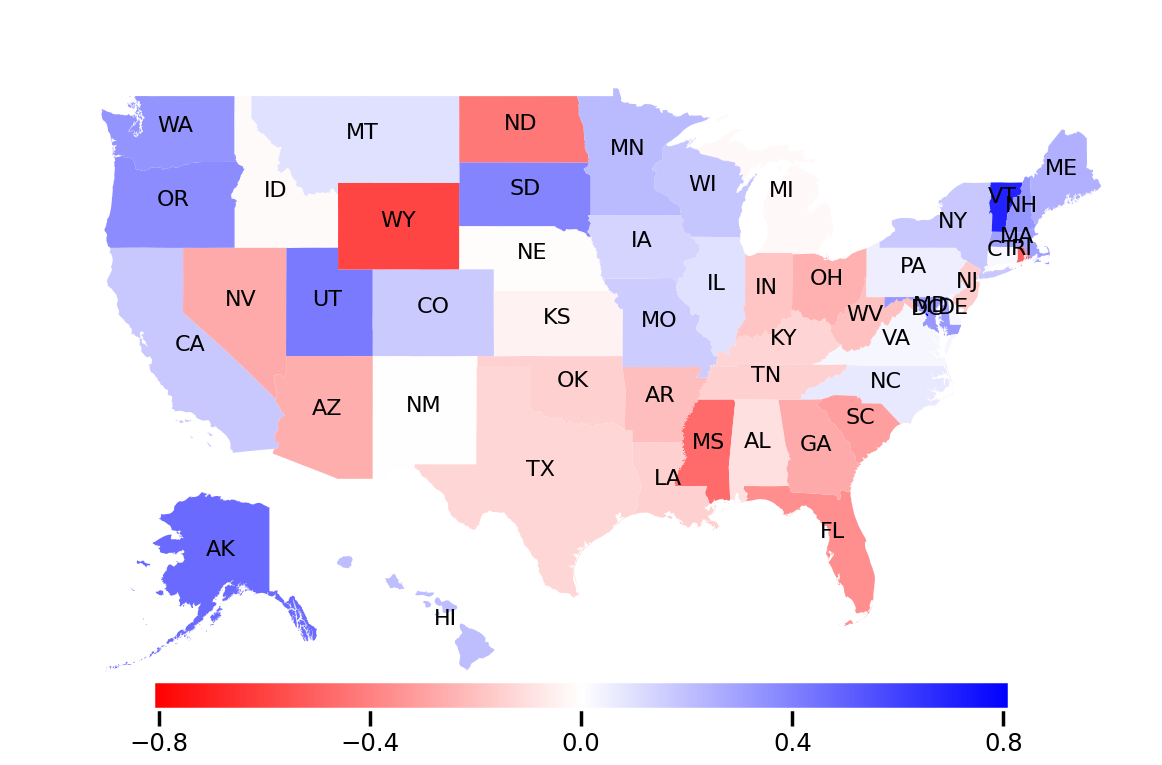

In [11]:
colors = ['red','white', 'blue']
paper_figure = f"{main_figures_path}/attitude_map_heatmap.svg"

sns.set_context('poster', 0.8)
figures.map_heatmap(odd_ratio, states, 'odd_ratios', colors, fontsize=16, figsize=(12, 12),
                    ticks_margin=0.4, ticks_round=1, cmap_orient='horizontal', fraction=0.026,
                      aspect=30, save=None, paper_figure=paper_figure)

In [ ]:
# trimmed_image = figures.trim_white_space(paper_figure)
# trimmed_image.save(paper_figure)

## Vaccination Percentage

In [6]:
state_base_vaccination = pd.read_parquet(f"{dataframes_path}/state_based_vaccination_percentage_and_odd_ratios.parquet")

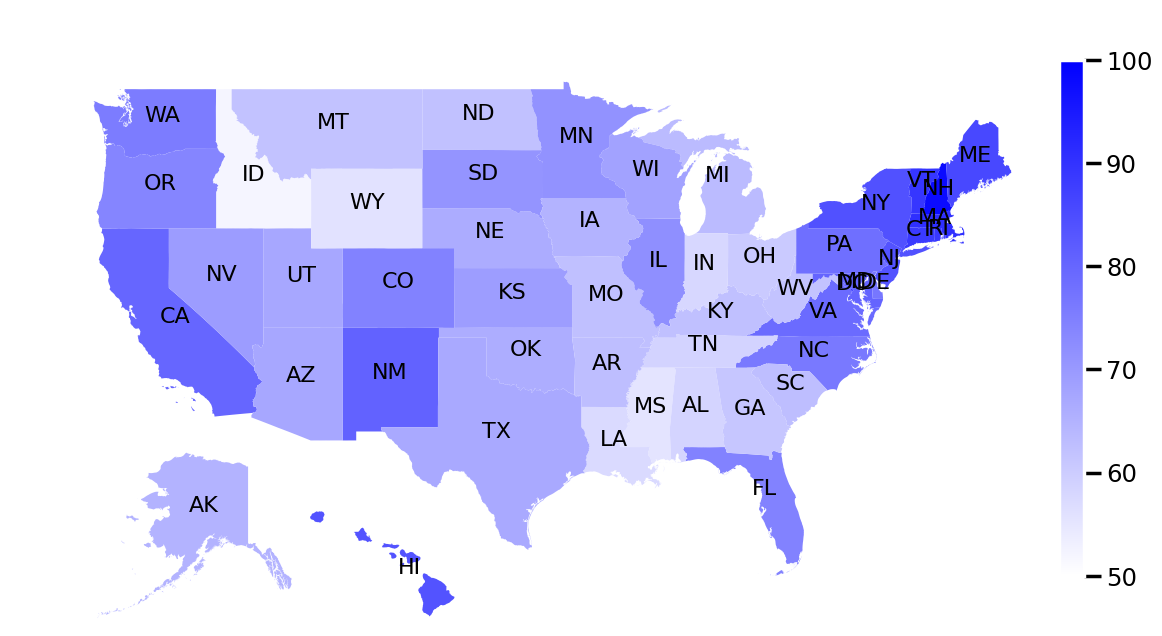

In [10]:
colors = ['white', 'blue']
save = f"{supp_figures_path}/people_vaccinated_per_hundered_map_heatmap.svg"

sns.set_context('poster', 0.8)
figures.map_heatmap(state_base_vaccination, states, 'people_vaccinated_per_hundred', colors,
                    fontsize=16, figsize=(12, 12), min_max=[50, 100], ticks_margin=None, ticks_round=1,
                    save=None, paper_figure=save)

In [ ]:
# trimmed_image = figures.trim_white_space(save)
# trimmed_image.save(save)

# CTM

In [8]:
fisher_exact = pd.read_parquet(f"{dataframes_path}/fisher_exact_test_results_ctm.parquet")
fisher_exact = fisher_exact[fisher_exact['state'].isin(main_configs['us_51_state'])]
fisher_exact.head()

,state,tweet_counts,padj,odd_ratios,topic
0,AK,78,0.459478,0.411827,1
1,AL,655,0.459478,0.162981,1
2,AR,430,0.447759,0.164298,1
3,AZ,1567,0.844222,-0.150729,1
4,CA,6195,3.534426,-0.159356,1


In [14]:
os.makedirs(f"{supp_figures_path}/ctm_choroplethmaps", exist_ok=True)
colors=["#4e3910", "#845d29", 'white', "#175f5d", "#1d1f54"]

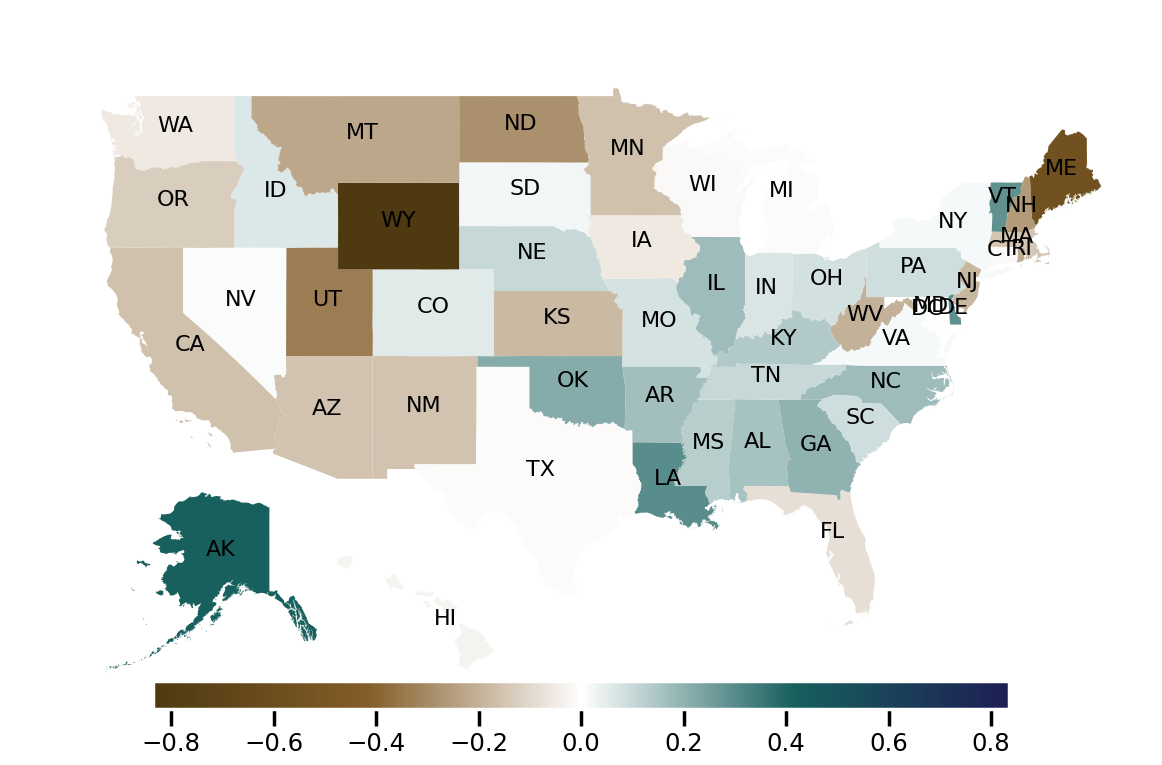

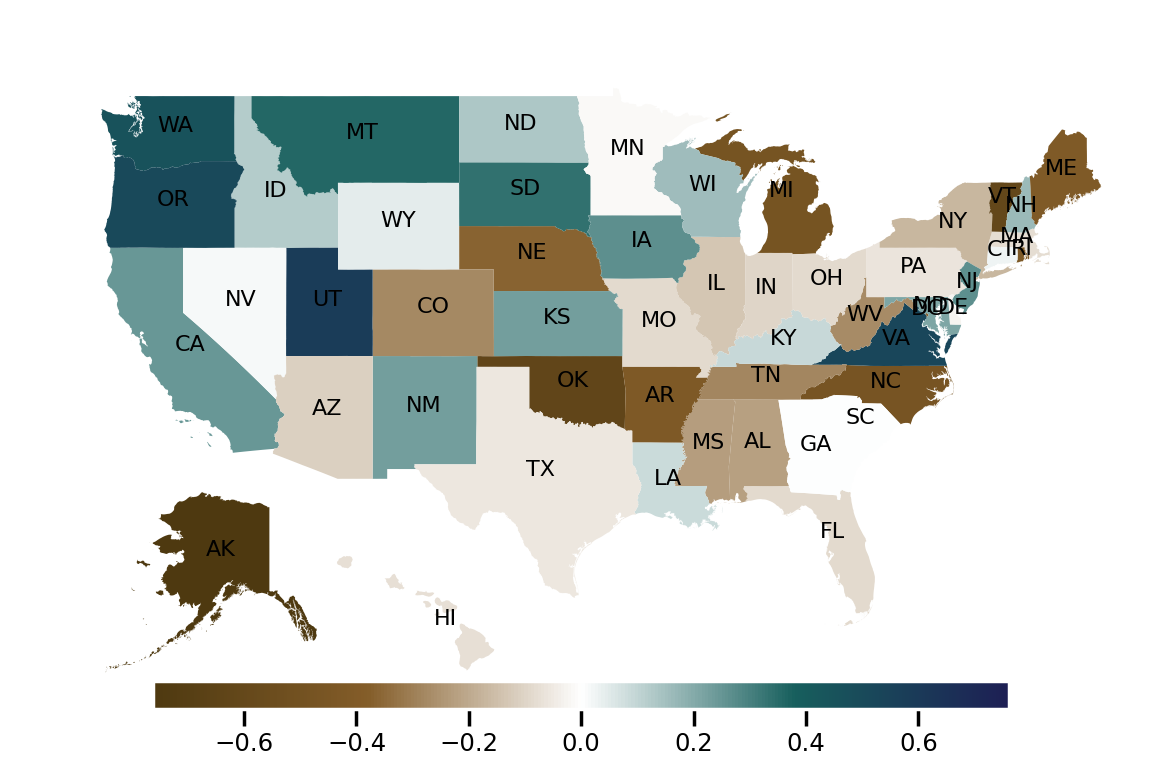

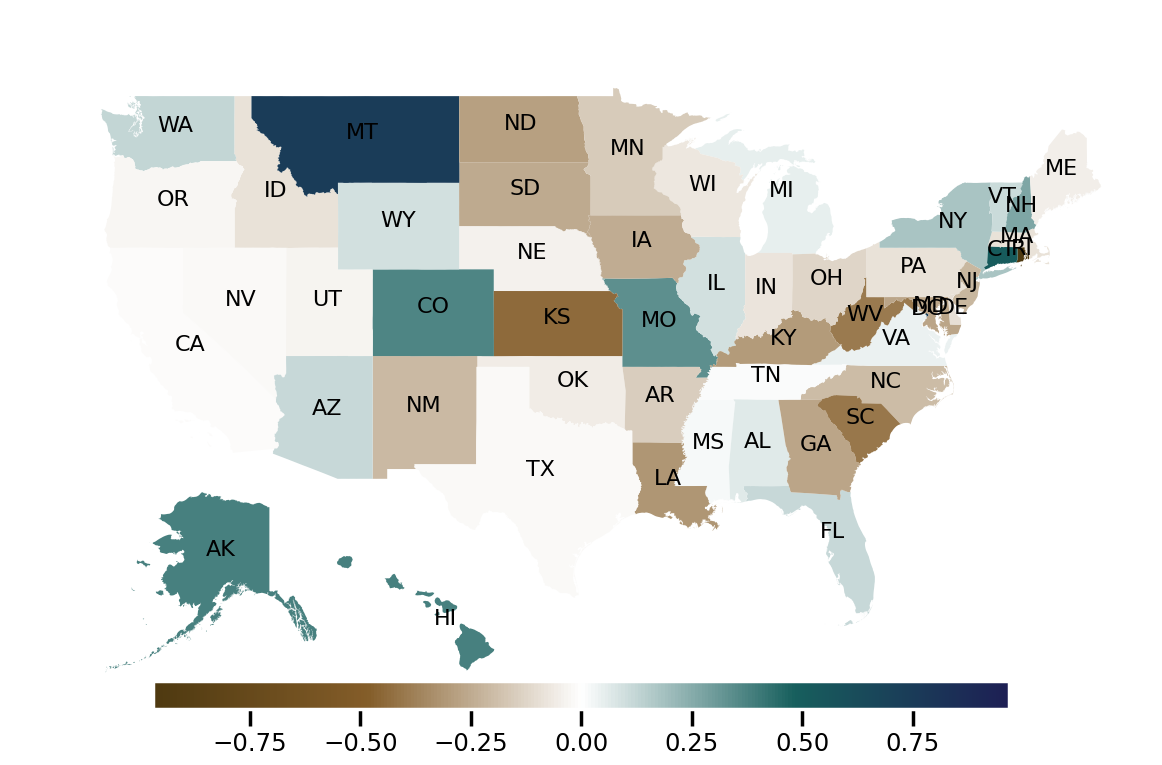

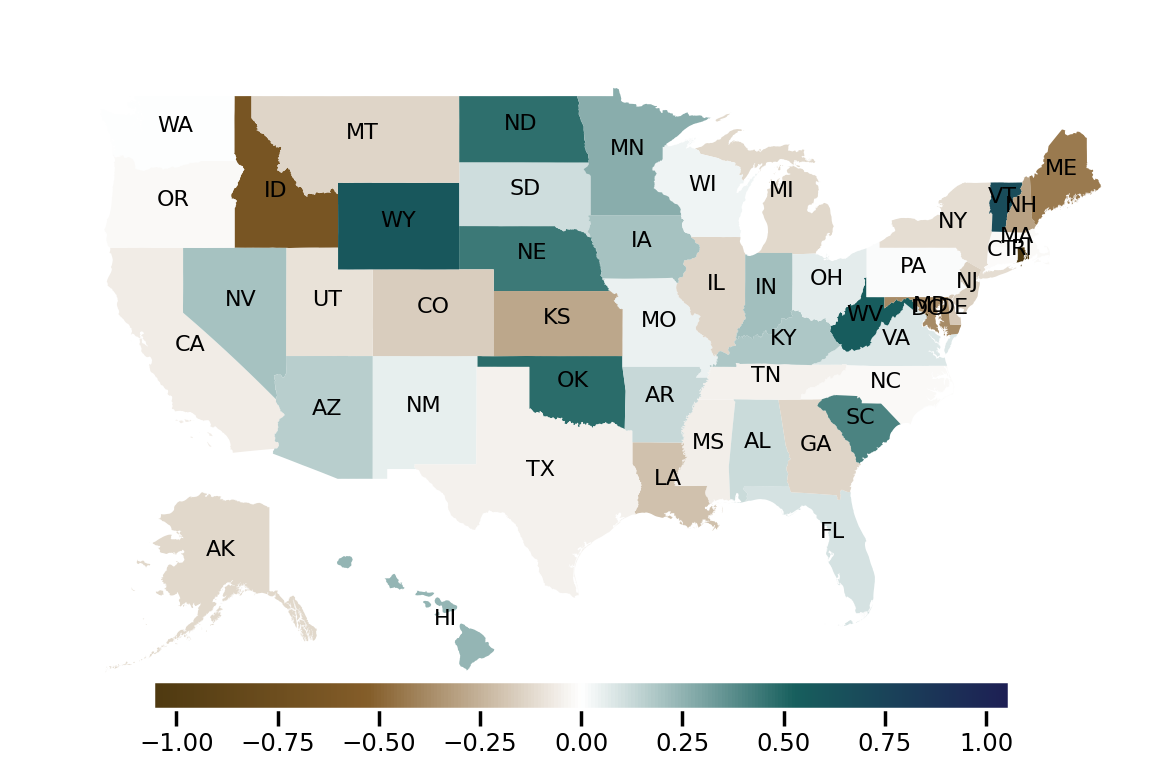

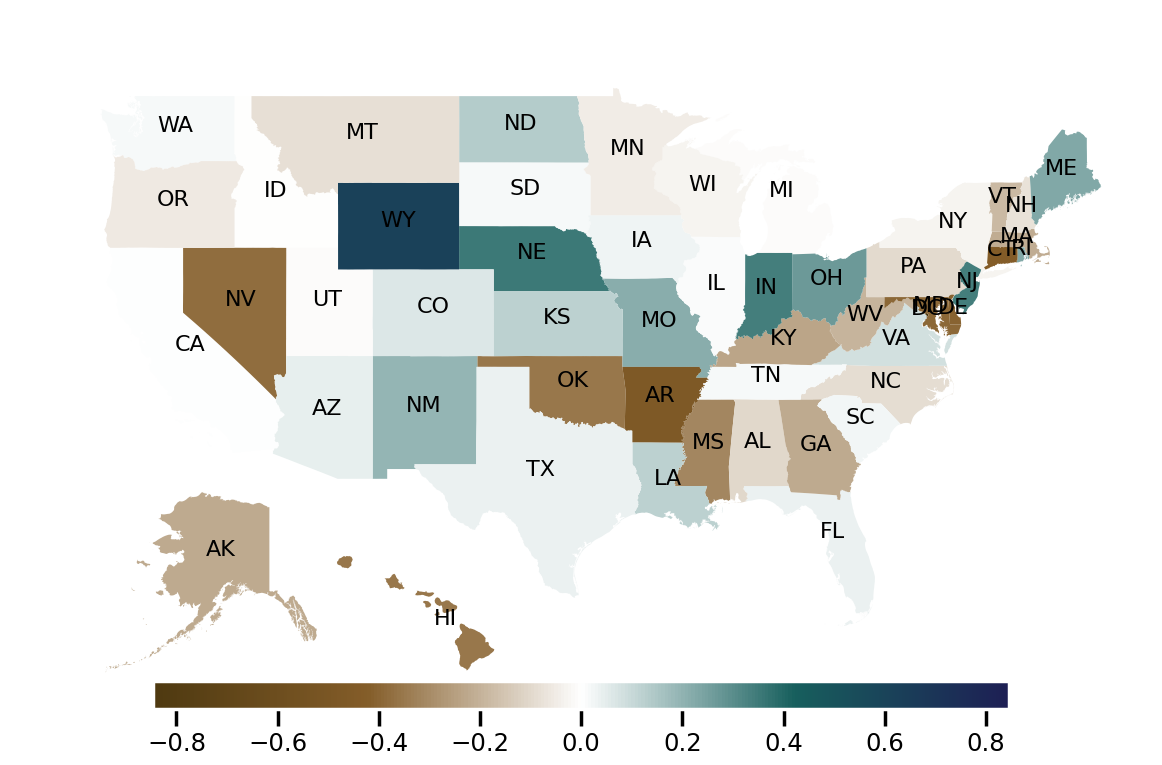

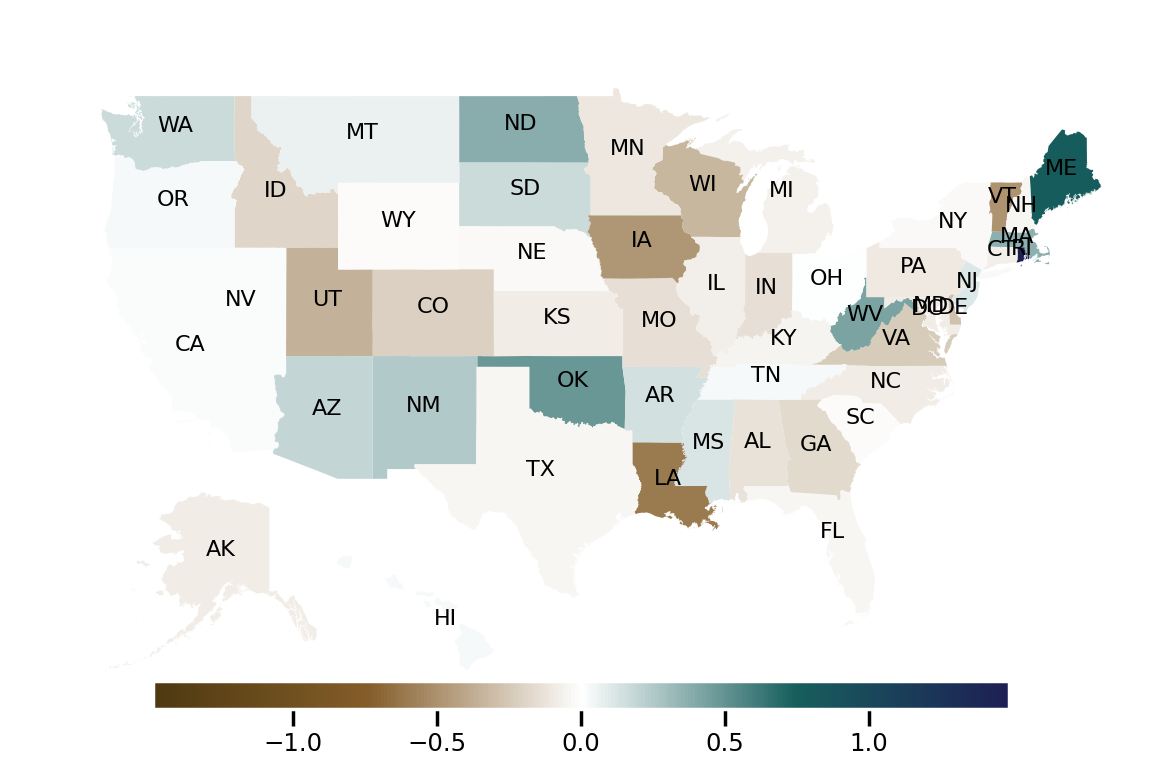

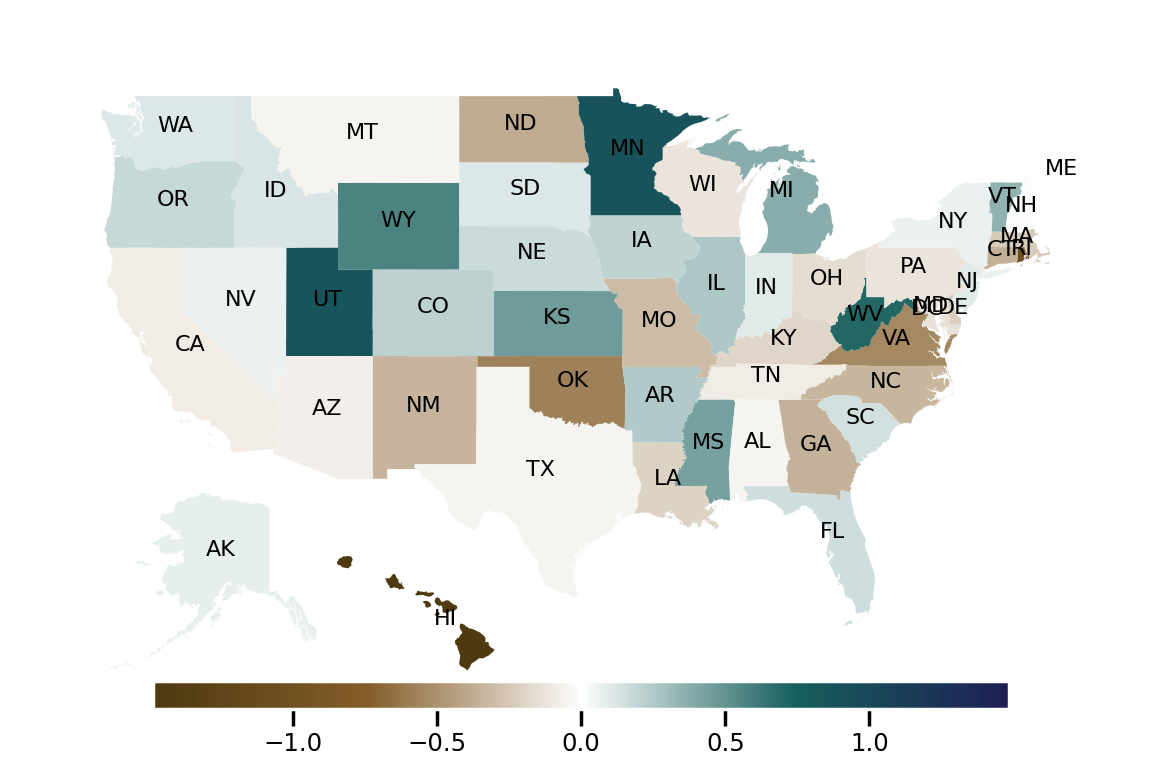

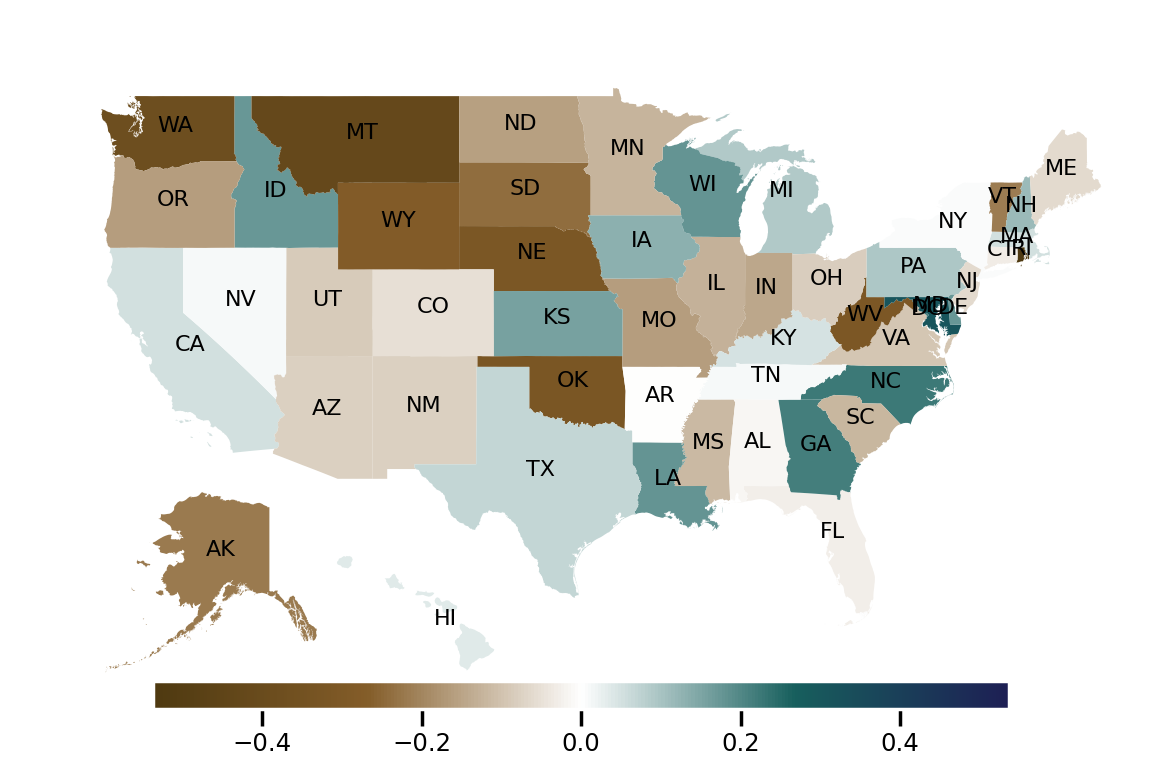

In [15]:
sns.set_context('poster', 0.8)
for topic in range(1, 9):
    df = fisher_exact[fisher_exact['topic'] == topic].drop(columns=['topic'])

    save = f"{supp_figures_path}/ctm_choroplethmaps/ctm_topic{topic}_choroplethmap.svg"
    
    figures.map_heatmap(df, states, 'odd_ratios', colors, fontsize=16, 
                        figsize=(12, 12), ticks_margin=None, ticks_round=1, 
                        cmap_orient='horizontal', fraction=0.026, aspect=30, save=None,
                        paper_figure=save)

In [ ]:
# for topic in range(1, 9):
#     save = f"{ctm_plot_saving_path}/ctm_topic{topic}_map_heatmap.png"

#     trimmed_image = figures.trim_white_space(save)
#     trimmed_image.save(save)